# Exercises

# Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.


- Has the network latency gone up since we switched internet service providers?

- HO: Network Latency goes up on switching internet service providers.
- H1: Network Latency does not go up on switching internet service providers.

True Positive: Reject HO When HO is False.
True Negative: Accept HO When HO is True.
Type I Error: Reject HO When Ho is True.
Type II Error: Accept HO When HO is False.

- Is the website redesign any good?

- HO: Website design is good.
- H1: Website design is not good.

True Positive: Reject HO When HO is False.
True Negative: Accept HO When HO is True.
Type I Error: Reject HO When Ho is True.
Type II Error: Accept HO When HO is False.

- Is our television ad driving more sales?

- HO: Television ad drives more sales.
- H1: Television ad does not drive sales.

True Positive: Reject HO When HO is False.
True Negative: Accept HO When HO is True.
Type I Error: Reject HO When Ho is True.
Type II Error: Accept HO When HO is False.

# Exercises

# Continue working in your hypothesis_testing notebook.

# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



In [95]:
from scipy.stats import ttest_ind_from_stats
ttest_ind_from_stats(mean1=90, std1=np.sqrt(15), nobs1=40,
                      mean2=100, std2=np.sqrt(20), nobs2=50)


Ttest_indResult(statistic=-11.178355270480116, pvalue=1.4236789708004715e-18)

In [96]:
p < α
print('We can reject Null Hypothesis')

We can reject Null Hypothesis


# Load the mpg dataset and use it to answer the following questions:
- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [97]:
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
from math import sqrt 
from pydataset import data

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [98]:
mpg = data('mpg')

In [99]:
df = mpg
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [101]:
df['fuel_eff'] = (df.cty + df.hwy)/2

In [102]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [103]:
cars_08 = df[df.year == 2008].fuel_eff
cars_99 = df[df.year == 1999].fuel_eff

# A. Plot Distribution

<AxesSubplot:>

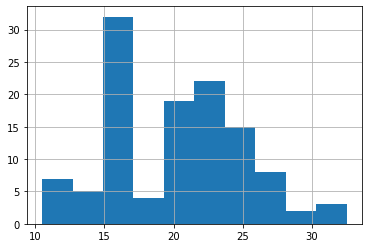

In [104]:
cars_08.hist()

<AxesSubplot:>

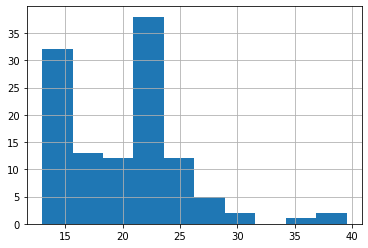

In [105]:
cars_99.hist()

In [106]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


# B. Hypothesis
- $H_{0}$: fuel_eff is the same for cars_08 and cars_99
- $H_{a}$: fuel_eff is not the same for cars_08 and cars_99


# C. Set Alpha

In [107]:
alpha = 0.05

# D. Verify Assumptions

In [108]:
# Independent
# How big is sample size for cars_08 and cars_99?
# If sample size is significantly greater than 30, we don't have to worry about normality. (CLT)
df.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

- Our sample size is large enough to meet the assumotions for normality.

In [109]:
# Equal Variances

cars_08.var(), cars_99.var()

(24.097480106100797, 27.122605363984675)

# E. Compute test statistic and probability (t-statistic & p-value)

In [110]:
# use Scipy's independent ttest to find t and p

t, p = stats.ttest_ind(cars_08, cars_99, equal_var= False)

t, p, alpha

(-0.21960177245940962, 0.8263750772060638, 0.05)

In [111]:
p = 0.8263750772060638
if (p< alpha):
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


In [112]:
df.fuel_eff.mean(), df.fuel_eff.var()

(20.14957264957265, 25.505429001137156)

# Are compact cars more fuel-efficient than the average car?

In [113]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [114]:
df= df.rename(columns={'class': 're_class'})

In [115]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,re_class,fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [116]:
cars_compact = df[df.re_class == 'compact'].fuel_eff

# A.  Plot Distibution

<AxesSubplot:>

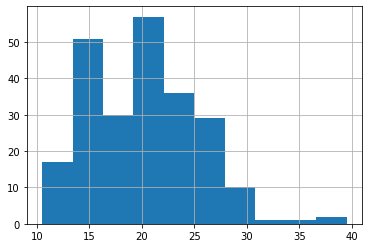

In [117]:
df.fuel_eff.hist() # Plot for fuel_eff of overall cars

<AxesSubplot:>

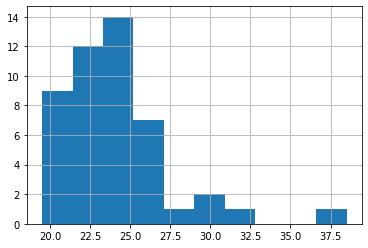

In [118]:
cars_compact.hist() # Plot for feul_eff of compact cars

# B. Set Hypothesis

# Are compact cars more fuel-efficient than the average car?
- H0: Mean of compact cars feul_eff = Mean of all cars fuel_eff
- HA: Mean of compact cars feul_eff > Mean of all cars fuel_eff


# C. Set Alpha

In [119]:
# We decide on 95% confidence level (alpha = 0.05)
alpha = 0.05

# D. Verify Assumptions

In [120]:
# How big is sample size for compact cars?
# If sample size is significantly > 30, we don't need to worry about normality (Central Limit Theorem)

df.re_class.value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: re_class, dtype: int64

- Our compact car sample > 30

# E. Compute test statistics and probability (t-statistics & p-value)

- scipy.stats.ttest_1samp
- For a 1-tailed test where our alternative hypothesis is testing for 'larger than', we evaluate p/2 < α and t > 0

In [121]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,re_class,fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [122]:
# calculate t and p statistic
over_all_car_mean = df.fuel_eff.mean()
t, p = stats.ttest_1samp(cars_compact, over_all_car_mean)

t, p/2, alpha

(7.896888573132535, 2.0992818971585668e-10, 0.05)

In [123]:
if (p/2 < alpha) & (t > 0):
    print('We reject the null hypothesis')
else:
    print('We fait to reject the null hypothesis')

We reject the null hypothesis


- Do manual cars get better gas mileage than automatic cars?

In [124]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,re_class,fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [125]:
df['is_automatic'] = df.trans.str.contains('auto')

In [126]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,re_class,fuel_eff,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,False


# A. Plot Distribution

In [127]:
# plot distibution of fuel_eff of automatic vehicle
cars_automatic = df[df.is_automatic == True].fuel_eff
cars_manual = df[df.is_automatic == False].fuel_eff

<AxesSubplot:>

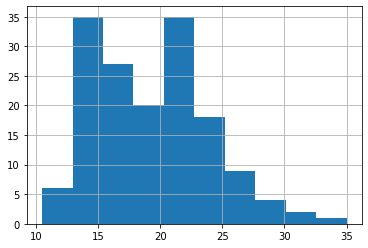

In [128]:
cars_automatic.hist()

<AxesSubplot:>

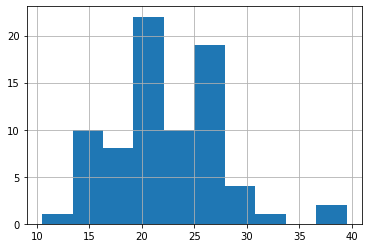

In [129]:
cars_manual.hist()

# B. Set Hypothesis

- Do manual cars get better gas mileage than automatic cars?
- HO: Mean fuel_eff of manual >= Mean feul_eff of automatic
- H1: Mean fuel_eff of manual < Mean feul_eff of automatic

# C. Set Alpha

In [131]:
alpha = 0.05

# D. Verify Assumptions

In [132]:
# How big is sample size for manual and automatic cars?
# If sample size is significantly > 30, we don't need to worry about normality (Central Limit Theorem)

df.is_automatic.value_counts()

True     157
False     77
Name: is_automatic, dtype: int64

- Based on this we can say that our sample size is larger than 30 for CLT.

# E. Compute test statistics and probability (t-statistics & p-value)
- scipy.stats.ttest_1samp
- For a 1-tailed test where our alternative hypothesis is testing for 'smaller than', we evaluate p/2 < α and t < 0

In [133]:
cars_automatic.var(), cars_manual.var()

(21.942777233382323, 26.635167464114833)

In [134]:
t, p = stats.ttest_ind(cars_manual, cars_automatic, equal_var= False)

t, p/2, alpha

(4.443514012903071, 8.976124499958965e-06, 0.05)

In [135]:
if (p/2 < alpha) & (t > 0):
    print('We reject the null hypothesis')
else:
    print('We fait to reject the null hypothesis')

We reject the null hypothesis


# Exercises

# Continue working in your hypothesis_testing notebook.


# 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [136]:
df_telco_churn = pd.read_csv('telco_churn.csv')

In [137]:
df_telco_churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


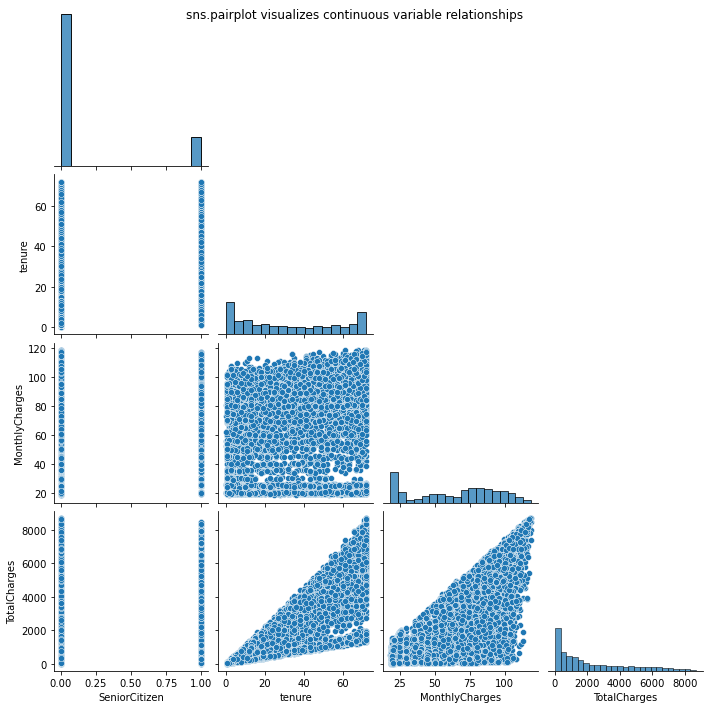

In [138]:
sns.pairplot(df_telco_churn, corner = True)
plt.suptitle('sns.pairplot visualizes continuous variable relationships')
plt.show()

# Hypothesis:
- HO:Tenure and monthlycharges has not linear relation.
- H1: Tenure and  monthlycharges has linear relation.

# Setting α

In [139]:
α = 0.05

In [140]:
corr, p = stats.pearsonr(df_telco_churn.tenure, df_telco_churn.MonthlyCharges)
corr, p

(0.24789985628615002, 4.0940449915016345e-99)

In [141]:
if p < α:
    print("We rejct the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p)

We rejct the null hypothesis
4.0940449915016345e-99


corr, p = stats.pearsonr(df_telco_churn.tenure, df_telco_churn.MonthlyCharges)
corr, p

In [142]:
df_telco_churn = df_telco_churn.dropna(subset=['TotalCharges'])
df_telco_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Hypothesis:
- HO:Tenure and totalcharges has not linear relation.
- H1: Tenure and  totalcharges has linear relation.
    

# Setting α

In [143]:
α = 0.05

In [144]:
corr, p = stats.pearsonr(df_telco_churn.tenure, df_telco_churn.TotalCharges)
corr, p

(0.825880460933202, 0.0)

In [145]:
if p < α:
    print("We rejct the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p)

We rejct the null hypothesis
0.0


- How to Control for Variables
- Perform your original analysis in a way that removes the variable we're trying to control out of the question.
- If we control for phone service, and test for linear correlation between tenure and monthly_charges, then we will create a no_phone and a phone group then check their tenure to monthly_charges correlation w/ the Pearson's test
- If we also control for internet connection, we'll need to produce each pairing of subsets

In [146]:
df_clean_telco = pd.read_csv('clean_telco.csv')

In [147]:
# We'll run a correlation test for 
df_clean_telco.phone_type.value_counts()

One Line             3386
Two or More Lines    2966
No Phone Service      680
Name: phone_type, dtype: int64

In [148]:
df_clean_telco.internet_type.value_counts()

Fiber Optic            3097
DSL                    2413
No Internet Service    1522
Name: internet_type, dtype: int64

In [149]:
# Let's combine all these different values together
df_clean_telco["telecom_setup"] = df_clean_telco.internet_type + " " + df_clean_telco.phone_type
df_clean_telco.head().T

,0,1,2,3,4
id,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
is_senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
phone_service,1,2,1,1,1
internet_service,1,1,2,2,2
contract_int,1,0,0,0,0
payment_type,Mailed check,Mailed check,Electronic check,Electronic check,Mailed check


In [150]:
df_clean_telco.telecom_setup.value_counts()

Fiber Optic Two or More Lines            1937
No Internet Service One Line             1182
Fiber Optic One Line                     1160
DSL One Line                             1044
DSL Two or More Lines                     689
DSL No Phone Service                      680
No Internet Service Two or More Lines     340
Name: telecom_setup, dtype: int64

In [151]:
options = df_clean_telco.telecom_setup.value_counts().index
options

Index(['Fiber Optic Two or More Lines', 'No Internet Service One Line',
       'Fiber Optic One Line', 'DSL One Line', 'DSL Two or More Lines',
       'DSL No Phone Service', 'No Internet Service Two or More Lines'],
      dtype='object')

In [152]:
options[1]

'No Internet Service One Line'

In [153]:
def correlation_test(x, y):
    message = ""
    corr, p = stats.pearsonr(x, y)
    
    if p < α:
        message = "reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation." 
    else:
        message = "fail to reject the null hypothesis that there is no linear correlation. Insufficient evidence to support a linear correlation between the two values."
    
    return corr, p, message

In [154]:
# Run through the set of all options for tenure vs. monthly_charges

output = []

for option in options:
    subset = df_clean_telco[df_clean_telco.telecom_setup == option]
    corr, p, message = correlation_test(subset.tenure_month, subset.monthly_charges)
    result = {
        "option": option,
        "corr": corr,
        "p": p,
        "message": message
    }
    output.append(result)

print("Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service")
pd.DataFrame(output)

Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service


,option,corr,p,message
0,Fiber Optic Two or More Lines,0.573677,6.125936e-170,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
1,No Internet Service One Line,-0.012010,6.799938e-01,fail to reject the null hypothesis that there is no linear correlation. Insufficient e...
2,Fiber Optic One Line,0.529938,5.607453e-85,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
3,DSL One Line,0.561734,7.199649e-88,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
4,DSL Two or More Lines,0.610191,1.647669e-71,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
5,DSL No Phone Service,0.591798,1.736039e-65,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
6,No Internet Service Two or More Lines,-0.031353,5.645227e-01,fail to reject the null hypothesis that there is no linear correlation. Insufficient e...


In [155]:
# Run through the set of all options for tenure vs. total_charges

output = []

for option in options:
    subset = df_clean_telco[df_clean_telco.telecom_setup == option]
    corr, p, message = correlation_test(subset.tenure_month, subset.total_charges)
    result = {
        "option": option,
        "corr": corr,
        "p": p,
        "message": message
    }
    output.append(result)

print("Correlation test for tenure vs. total_charges, controling for Internet/Phone service") 
pd.DataFrame(output)

Correlation test for tenure vs. total_charges, controling for Internet/Phone service


,option,corr,p,message
0,Fiber Optic Two or More Lines,0.983949,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
1,No Internet Service One Line,0.999276,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
2,Fiber Optic One Line,0.987473,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
3,DSL One Line,0.974246,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
4,DSL Two or More Lines,0.967037,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
5,DSL No Phone Service,0.954261,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
6,No Internet Service Two or More Lines,0.998031,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...


# 2. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [156]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [157]:
df_emp1 = pd.read_sql('select e.emp_no, hire_date, de.to_date, max(salary), datediff(curdate(), hire_date) as duration_emp from  employees as e join salaries as s on s.emp_no = e.emp_no join dept_emp as de on de.emp_no = s.emp_no group by emp_no, hire_date, de.to_date', url)

df_emp1 = df_emp1.rename(columns={'max(salary)': 'salary'})
df_emp1

,emp_no,hire_date,to_date,salary,duration_emp
0,10001,1986-06-26,9999-01-01,88958,12920
1,10002,1985-11-21,9999-01-01,72527,13137
2,10003,1986-08-28,9999-01-01,43699,12857
3,10004,1986-12-01,9999-01-01,74057,12762
4,10005,1989-09-12,9999-01-01,94692,11746
...,...,...,...,...,...
331598,499995,1993-01-12,9999-01-01,52868,10528
331599,499996,1990-09-27,9999-01-01,69501,11366
331600,499997,1986-04-21,9999-01-01,83441,12986
331601,499998,1993-10-13,9999-01-01,55003,10254


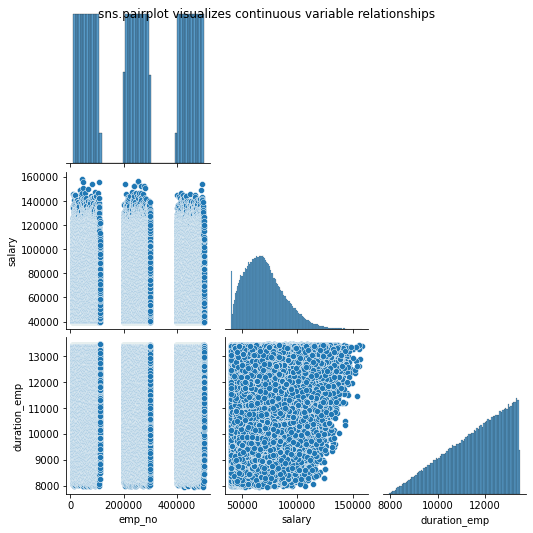

In [158]:
sns.pairplot(df_emp1, corner = True)
plt.suptitle('sns.pairplot visualizes continuous variable relationships')
plt.show()

# Hypothesis:
- HO: emp_duration and salary has not linear relation.
- H1: emp_duration and salary has linear relation.
# Setting α

In [159]:
α = 0.05

In [160]:
corr, p = stats.pearsonr(df_emp1.salary, df_emp1.duration_emp)
corr, p

(0.2686919506435047, 0.0)

In [161]:
if p < α:
    print("We rejct the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p)

We rejct the null hypothesis
0.0


- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [162]:
df_emp2 = pd.read_sql('select e.emp_no, hire_date, de.to_date, max(salary), datediff(curdate(), hire_date) as duration_emp, count(title) as num_title from  employees as e join salaries as s on s.emp_no = e.emp_no join dept_emp as de on de.emp_no = s.emp_no join titles as t on de.emp_no = t.emp_no group by emp_no, emp_no, hire_date, de.to_date', url)

df_emp2

,emp_no,hire_date,to_date,max(salary),duration_emp,num_title
0,10001,1986-06-26,9999-01-01,88958,12920,17
1,10002,1985-11-21,9999-01-01,72527,13137,6
2,10003,1986-08-28,9999-01-01,43699,12857,7
3,10004,1986-12-01,9999-01-01,74057,12762,32
4,10005,1989-09-12,9999-01-01,94692,11746,26
...,...,...,...,...,...,...
331598,499995,1993-01-12,9999-01-01,52868,10528,6
331599,499996,1990-09-27,9999-01-01,69501,11366,14
331600,499997,1986-04-21,9999-01-01,83441,12986,30
331601,499998,1993-10-13,9999-01-01,55003,10254,18


# Hypothesis:
- HO: emp_duration and num_title has not linear relation.
- H1: emp_duration and num_title has linear relation.
# Setting α

In [163]:
α = 0.05

In [164]:
corr, p = stats.pearsonr(df_emp2.num_title, df_emp2.duration_emp)
corr, p

(0.4529870218876091, 0.0)

In [165]:
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p)

We reject the null hypothesis
0.0


# 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [166]:
from pydataset import data
df = data("sleepstudy")
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [167]:
corr, p = stats.pearsonr(df.Days, df.Reaction)
corr, p

(0.5352302262650253, 9.894096322214812e-15)

# Hypothesis:
- HO: Days and Reaction Time has not linear relation.
- H1: Days and Reaction Time are linear relation.
# Setting α

In [168]:
α = 0.05

In [169]:
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p)

We reject the null hypothesis
9.894096322214812e-15


In [170]:
Consider 

x = np.arange(1, 100)
y = 5 * x

slope is 5, correlation coefficient is 1 (since y values are a precise function of x)

x = np.arange(1, 100)
y = .25 * x

slope is .25, correlation coefficient is 1 (since y is a precise function of x)

SyntaxError: invalid syntax (15420026.py, line 6)

# Exercises

# Continue working in your hypothesis_testing notebook.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
from scipy import stats

# Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

-                      	          Codeup Student	  Not Codeup Student
- Uses a Macbook          	             49        	          20
- Doesn't Use A Macbook      	         1         	          30


In [ ]:
index = ['Macbook', 'No Mackbook']
columns = ['Codeup Student', 'Not Codeup Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()
observed

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

# Hypothesis:
- HO: Using a Macbook and Being a Codeup Student Time has no association.
- H1: Using a Macbook and Being a Codeup Student Time has no association.
# Setting α

In [ ]:
α = 0.05

In [ ]:
if p < α:
    print('We reject the null')
else:
    print("we fail to reject the null")

# 2. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [ ]:
import pandas as pd
from scipy import stats
from pydataset import data

In [ ]:
mpg = data('mpg')
mpg

In [ ]:
mpg = mpg.rename(columns={'class': 'class_name'})
mpg

# Setting Hypothesis

- HO: manufacturer has no association drv
- H1: manufacturer has association drv

# Setting α

In [ ]:
α = 0.05

In [ ]:
observed = pd.crosstab(mpg.drv, mpg.manufacturer)
observed

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
if p < α:
    print('We reject the null')
else:
    print("we fail to reject the null")

# Setting Hypothesis

- HO: Highway mileage has no association class
- H1: Highway mileage has association class

# Setting α

In [ ]:
α = 0.05

In [ ]:
mpg = mpg.rename(columns={'class': 'class_name'})
mpg

In [ ]:
observed = pd.crosstab(mpg.class_name, mpg.hwy)
observed

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
if p < α:
    print('We reject the null')
else:
    print("we fail to reject the null")

# 3. Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

- Is an employee's gender independent of whether or not they are or have been a manager?

In [ ]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [ ]:
df_emp1 = pd.read_sql('''select * from employees as e join dept_emp as de on e.emp_no = de.emp_no where (to_date > curdate() and (dept_no = 'd001' or dept_no = 'd007'))''', url)

df_emp1

# Setting Hypothesis
- HO: Employee's gender has no association with SALES or Marketing Departments
- H1: Employee's gender has association with SALES or Marketing Departments

# Setting α

In [171]:
α = 0.05

In [172]:
observed = pd.crosstab(df_emp1.gender, df_emp1.dept_no)
observed

AttributeError: 'DataFrame' object has no attribute 'gender'

In [173]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


In [174]:
if p < α:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


- Is an employee's gender independent of whether or not they are or have been a manager?

# Setting Hypothesis
- HO: Employee's gender has no association with being Manager.
- H1: Employee's gender has association with being Manager.

# Setting α

In [175]:
α = 0.05

In [176]:
df_emp2 = pd.read_sql('''select gender, e.emp_no, dm.dept_no from employees as e 
join dept_manager as dm on e.emp_no = dm.emp_no
join departments as d on dm.dept_no = d.dept_no''', url)

df_emp2

,gender,emp_no,dept_no
0,F,111692,d009
1,F,111784,d009
2,F,111877,d009
3,M,111939,d009
4,M,110511,d005
5,F,110567,d005
6,M,110085,d002
7,F,110114,d002
8,F,110183,d003
9,F,110228,d003


In [177]:
observed = pd.crosstab(df_emp2.gender, df_emp2.dept_no)
observed

dept_no,d001,d002,d003,d004,d005,d006,d007,d008,d009
gender,,,,,,,,,
F,0,1,2,2,1,3,0,1,3
M,2,1,0,2,1,1,2,1,1


In [178]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[0 1 2 2 1 3 0 1 3]
 [2 1 0 2 1 1 2 1 1]]
---
Expected

[[1.08333333 1.08333333 1.08333333 2.16666667 1.08333333 2.16666667
  1.08333333 1.08333333 2.16666667]
 [0.91666667 0.91666667 0.91666667 1.83333333 0.91666667 1.83333333
  0.91666667 0.91666667 1.83333333]]
---

chi^2 = 7.8881
p     = 0.4445


In [179]:
if p < α:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null
